In [1]:
import pandas as pd
import numpy as np

Let's start like before, by reading in our .csv. 
This time, it deals with supemarket sales ans has information on the purchases made, such as the type of the shopper, the gender, the price and quantity of items, the product line, etc. We also get info on the city in which the purchase has been made and the rating (review) of the purchase. Can you think of some research questions that we can pose, knowing we have this information?

In [2]:
sales = pd.read_csv('data/supermarket_sales.csv')
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,NaN,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,NaN,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,NaN,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,139-32-4183,A,Yangon,Member,Female,Sports and travel,97.48,9.0,43.8660,921.1860,3/14/2019,14:19,Ewallet,877.32,4.761905,43.8660,7.4
985,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1.0,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
986,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
987,518-71-6847,B,Mandalay,Member,Male,Food and beverages,26.6,6.0,7.9800,167.5800,2/26/2019,15:10,Ewallet,159.60,4.761905,7.9800,4.9


### Let's explore our dataset a little bit
To get a feel for the dataset, we can take a look at the column names and the first ten entries. 

```head()``` usually shows us the first five rows of the data, but we can also extend that by specifying the number of rows we are interested in as a parameter of the function.

In [3]:
sales.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,NaN,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,NaN,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,NaN,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7.0,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,,Yangon,Member,Female,Electronic accessories,68.84,6.0,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10.0,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2.0,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3.0,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


We can also take a random sample from the dataset using the ```sample()``` method. As a parameter, we specify how big of a sample we need.

In [4]:
sales.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
558,712-39-0363,A,Yangon,Member,Male,Food and beverages,41.66,6.0,12.498,262.458,1/2/2019,15:24,Ewallet,249.96,4.761905,12.498,5.6
59,120-06-4233,C,Naypyitaw,Normal,Male,Electronic accessories,30.61,6.0,9.183,192.843,3/12/2019,20:36,Cash,183.66,4.761905,9.183,9.3
259,380-94-4661,C,Naypyitaw,Member,Male,Electronic accessories,65.94,4.0,13.188,276.948,2/7/2019,13:05,Credit card,263.76,4.761905,13.188,6.9
184,586-25-0848,A,Yangon,Normal,Female,Sports and travel,12.34,7.0,4.319,90.699,3/4/2019,11:19,Credit card,86.38,4.761905,4.319,6.7
927,226-34-0034,B,Mandalay,Normal,Female,Electronic accessories,13.78,4.0,2.756,57.876,1/10/2019,11:10,Ewallet,55.12,4.761905,2.756,9.0


We can also check the shape of the DataFrame and the number of unique entries per column. The latter values are considered to be "categorical data", because they sort data in categories or groups. Which columns in our dataset can be considered categorical?

In [5]:
sales.shape

(989, 17)

In [6]:
sales['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories', nan], dtype=object)

We can also check a specific entry (here by using indexing) to see an example entry from our dataset. 

In [9]:
sales.iloc[200]

Invoice ID                       606-80-4905
Branch                                     C
City                               Naypyitaw
Customer type                         Member
Gender                                Female
Product line               Sports and travel
Unit price                             19.15
Quantity                                 6.0
Tax 5%                                 5.745
Total                                120.645
Date                               1/29/2019
Time                                   10:01
Payment                          Credit card
cogs                                   114.9
gross margin percentage             4.761905
gross income                           5.745
Rating                                   6.8
Name: 200, dtype: object

In [10]:
sales.Gender.unique()

array(['Female', 'Male'], dtype=object)

We can also check the nr of entries in which the customer was a male:

In [11]:
sales_male = sales[sales['Gender']=='Male']
sales_male.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7.0,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4.0,5.1020,107.1420,3/9/2019,17:03,Cash,102.04,4.761905,5.1020,6.8
13,252-56-2699,A,Yangon,Normal,Male,Food and beverages,43.19,10.0,21.5950,453.4950,2/7/2019,16:48,Ewallet,431.90,4.761905,21.5950,8.2
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6.0,21.7830,457.4430,1/1/2019,10:39,Credit card,435.66,4.761905,21.7830,6.9
18,329-62-1586,A,Yangon,Normal,Male,Food and beverages,54.67,3.0,8.2005,172.2105,1/21/2019,18:00,Credit card,164.01,4.761905,8.2005,8.6
20,300-71-4605,C,Naypyitaw,Member,Male,Electronic accessories,86.04,5.0,21.5100,451.7100,2/25/2019,11:24,Ewallet,430.20,4.761905,21.5100,4.8
21,371-85-5789,B,Mandalay,Normal,Male,Health and beauty,,3.0,13.1970,277.1370,3/5/2019,10:40,Ewallet,263.94,4.761905,13.1970,5.1


In [12]:
sales_female = sales[sales['Gender']=='Female']
sales_female.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,NaN,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,NaN,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,NaN,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
6,355-53-5943,,Yangon,Member,Female,Electronic accessories,68.84,6.0,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10.0,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2.0,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3.0,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4.0,2.8960,60.8160,2/6/2019,18:07,Ewallet,57.92,4.761905,2.8960,4.5
12,365-64-0515,A,Yangon,Normal,Female,Electronic accessories,46.95,5.0,11.7375,246.4875,2/12/2019,10:25,Ewallet,234.75,4.761905,11.7375,7.1
14,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10.0,35.6900,749.4900,3/29/2019,19:21,Cash,713.80,4.761905,35.6900,5.7
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6.0,28.1160,590.4360,1/15/2019,16:19,Cash,562.32,4.761905,28.1160,4.5


In [13]:
print(f' Purchases made by people identifying as male: {sales_male.shape} \n Purchases made by people identifying as female: {sales_female.shape}')



 Purchases made by people identifying as male: (493, 17) 
 Purchases made by people identifying as female: (496, 17)


We can see our dataset is pretty balanced when it comes to the categorical variable of gender.

Or the nr of entries where the total sum of the invoice was less than 100 e.

In [14]:
sales[sales['Total'] < 100].head(10)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,NaN,80.220,3/8/2019,10:29,Cash,76.40,4.761905,3.820,9.6
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2.0,3.626,76.146,1/10/2019,17:15,Credit card,72.52,4.761905,3.626,7.2
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4.0,2.896,60.816,2/6/2019,18:07,Ewallet,57.92,4.761905,2.896,4.5
19,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.3,2.0,4.030,84.630,3/11/2019,15:30,Ewallet,80.60,4.761905,4.030,4.4
22,273-16-6619,B,Mandalay,Normal,Male,Home and lifestyle,33.2,2.0,3.320,69.720,3/15/2019,12:20,Credit card,66.40,4.761905,3.320,4.4
26,649-29-6775,B,Mandalay,Normal,Male,Fashion accessories,33.52,1.0,1.676,35.196,2/8/2019,15:31,Cash,33.52,4.761905,1.676,6.7
35,232-16-2483,C,Naypyitaw,Member,Female,Sports and travel,68.12,1.0,3.406,71.526,1/7/2019,12:28,Ewallet,68.12,4.761905,3.406,6.8
40,280-35-5823,B,Mandalay,Member,Female,Home and lifestyle,86.72,1.0,4.336,91.056,1/17/2019,18:45,Ewallet,86.72,4.761905,4.336,7.9
44,617-15-4209,C,Naypyitaw,Member,Male,Health and beauty,15.37,2.0,1.537,32.277,3/16/2019,19:47,Cash,30.74,4.761905,1.537,7.2
52,616-24-2851,B,Mandalay,Member,Female,Fashion accessories,17.87,4.0,3.574,75.054,3/22/2019,14:42,Ewallet,71.48,4.761905,3.574,6.5


Using shape() we check the number of rows that have the total amount less than a 100 e.

In [15]:
sales[sales['Total'] < 100].shape

(205, 17)

Then, we can do the same for over 100 e.

In [16]:
sales[sales['Total'] > 100].head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7.0,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,,Yangon,Member,Female,Electronic accessories,68.84,6.0,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10.0,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3.0,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4.0,5.1020,107.1420,3/9/2019,17:03,Cash,102.04,4.761905,5.1020,6.8
12,365-64-0515,A,Yangon,Normal,Female,Electronic accessories,46.95,5.0,11.7375,246.4875,2/12/2019,10:25,Ewallet,234.75,4.761905,11.7375,7.1
13,252-56-2699,A,Yangon,Normal,Male,Food and beverages,43.19,10.0,21.5950,453.4950,2/7/2019,16:48,Ewallet,431.90,4.761905,21.5950,8.2


In [17]:
sales[sales['Total'] > 100].shape

(783, 17)

We immidiately can concude by the nr of entries, that most common were the purchases totalling over 100 e (783 vs 205)

In [18]:
sales['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card', nan], dtype=object)

In [19]:
sales[sales['Payment']=='Cash'].shape


(341, 17)

Now, if we wanted to continue playing around, we could do the same for Payment and check the number of entries in each category. We can also try reading that from a plot later on.

### Dataset cleaning

In order to draw any conclusions from our data, our dataset must be clean and balanced.
This can mean different things for different scenarios. At this point, let's just say that we need to figure out how to handle the duplicate entries that might skew our analyses;  what to do with the empty cells and how to change the datatype of the cells.

#### Duplicates

Let's take a look at what the funciton ```duplicated()``` does.

In [20]:
print(sales.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
984    False
985    False
986    False
987     True
988    False
Length: 989, dtype: bool


We can also separate the duplicated rows in another dataframe.

In [93]:
duplicateRows = sales[sales.duplicated()]
duplicateRows

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
868,101-81-4070,C,Naypyitaw,Member,Female,Health and beauty,62.82,2.0,6.2820,131.9220,1/17/2019,12:36,Ewallet,125.64,4.761905,6.2820,4.9
973,448-34-8700,B,Mandalay,Member,Male,Home and lifestyle,36.91,7.0,12.9185,271.2885,2/10/2019,13:51,Ewallet,258.37,4.761905,12.9185,6.7
987,518-71-6847,B,Mandalay,Member,Male,Food and beverages,26.6,6.0,7.9800,167.5800,2/26/2019,15:10,Ewallet,159.60,4.761905,7.9800,4.9


There are multiple ways of dealing with duplicates, e.g.


```
df.drop_duplicates (inplace=True) 

```

which makes sure that we are not creating a new dataframe but that the dupicates are removed from the old one.


We can also use 
```
df = df[df.duplicated(keep='last')]
 
```

which keeps the last occurence of the duplicate

or 

```
df = df[df.duplicated(keep='first')]
```

which keeps the first occurence of the duplicate.

In these cases, we need to store it to a new dataframe variable, otherwise it won't be applied to the dataframe permanently (unlike with the drop_duplicates() function).


In [21]:
df_fresh = sales[sales.duplicated(keep='last')]

In [22]:
df_fresh.shape

(3, 17)

In [23]:
sales.drop_duplicates(inplace = True)

In [24]:
sales.shape

(986, 17)

-- We see that the nr of rows diminished.

In [25]:
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,NaN,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,NaN,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,NaN,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,809-46-1866,A,Yangon,Normal,Male,Health and beauty,58.15,4.0,11.6300,244.2300,1/23/2019,17:44,Cash,232.60,4.761905,11.6300,8.4
984,139-32-4183,A,Yangon,Member,Female,Sports and travel,97.48,9.0,43.8660,921.1860,3/14/2019,14:19,Ewallet,877.32,4.761905,43.8660,7.4
985,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1.0,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
986,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


We can also uss the parameter ```keep``` with the ```drop_duplicates()``` function (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html).

#### Empty cells

One way to deal with empty cells is to remove rows that contain empty cells. This is usually fine, since data sets can be very big, and removing a few rows will not have a big impact on the result.



In [26]:
sales[sales.isna().any(axis=1)]


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,NaN,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,NaN,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,NaN,80.220,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
586,278-86-2735,A,Yangon,Normal,Female,NaN,52.34,3.0,7.8510,164.871,3/27/2019,14:03,Cash,157.02,4.761905,7.8510,9.2
716,857-16-3520,A,Yangon,NaN,Female,Fashion accessories,71.46,7.0,25.0110,525.231,3/28/2019,16:06,Ewallet,500.22,4.761905,25.0110,4.5
872,584-66-4073,C,NaN,Normal,Male,Fashion accessories,56.5,1.0,2.8250,59.325,3/13/2019,15:45,Ewallet,56.50,4.761905,2.8250,9.6
898,409-49-6995,C,Naypyitaw,Member,Female,NaN,47.27,6.0,14.1810,297.801,2/5/2019,10:17,Cash,283.62,4.761905,14.1810,8.8
916,717-96-4189,C,Naypyitaw,Normal,Female,Electronic accessories,35.49,6.0,10.6470,223.587,2/2/2019,12:40,NaN,212.94,4.761905,10.6470,4.1
963,324-92-3863,A,Yangon,Member,Male,Electronic accessories,20.89,2.0,2.0890,43.869,2/5/2019,18:45,Cash,41.78,4.761905,2.0890,NaN


In [27]:
sales[sales['Branch'].isna()]


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,NaN,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,NaN,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1


We can, for example, fill the empty cell with some other type of value.

In [28]:
sales["Branch"].fillna('A', inplace = True)

We still have all the other NaN values so let's take care of them. We know we have (at least) one NaN in the Tax 5% column. Let's fill that out by calculating:

In [29]:
sales_tax = sales.Total * 0.05

In [30]:
sales["Tax 5%"].fillna(sales_tax, inplace = True)

In [31]:
sales.iloc[917]

Invoice ID                         749-81-8133
Branch                                       A
City                                    Yangon
Customer type                           Normal
Gender                                  Female
Product line               Fashion accessories
Unit price                               94.67
Quantity                                   4.0
Tax 5%                                  18.934
Total                                  397.614
Date                                 3/11/2019
Time                                     12:04
Payment                                   Cash
cogs                                    378.68
gross margin percentage               4.761905
gross income                            18.934
Rating                                     6.8
Name: 918, dtype: object

As we see, the 'Tax 5%' column was filled in by the content of the variable ```sales_tax```, i.e. 4.011 (80.22 * 0.05).
We can also use functions like ```mean()```, ```max()```, ```min()``` and  ```mode()``` to fill out the empty values. The first three you are familiar with and ```mode()``` fills out the empty space with the most frequent value in the column:

In [32]:
mode_payement = sales['Payment'].mode()
mode_payement

0    Cash
Name: Payment, dtype: object

In [33]:
mode_payement = sales['Payment'].mode()[0]
mode_payement

'Cash'

In [34]:
sales["Payment"].fillna(mode_payement, inplace = True)

Or, we can always just remove the rows with the empty cells, or create a new dataframe that has no empty cells.
We do that through the ```dropna()``` function. If we use it without parameters, it will return a new DataFrame, while if we use the ```inplace = True``` parameter, it will change the original one.

In [35]:
sales.shape

(986, 17)

In [36]:
sales.dropna(inplace=True)

In [37]:
sales['Total'].isnull().sum()

0

In [38]:
sales.shape

(980, 17)

In the end, we have lost 7 rows which had NaN values in them, and now our dataframe should be NaN-free:

In [39]:
sales[sales.isna().any(axis=1)]


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


#### Wrong type

Cells with data of wrong datatype can make it difficult to analyze data.

To fix it, you have two options: remove the rows, or convert all cells in the columns into the same format.


In [40]:
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                  object
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

We have a problem with the quantity. It's a float, but we can never buy two and a half items or smth like that. So we need to cast it to an int. 

In [41]:
sales.Quantity = sales.Quantity.astype(int)
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                  object
Quantity                     int32
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [42]:
sales['Unit price']= pd.to_numeric(sales['Unit price'], errors='coerce')
sales = sales.replace(np.nan, 0, regex=True)
print(sales.dtypes)


Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int32
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


Same with the date and time - they're objects (which stands for a string) and not actually date and time. So let's change that.

In [43]:
sales.Date = pd.to_datetime(sales.Date)

sales.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int32
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [44]:
# Use DataFrame.apply() to convert multiple columns to datetime
sales[['Date','Time']] = sales[['Date','Time']].apply(pd.to_datetime)
sales.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int32
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [45]:
sales.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,4.0110,80.2200,2019-03-08,2023-05-16 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-05-16 13:23:00,Credit card,324.31,4.761905,16.2155,7.4


#### Digression - apply()

apply() is a useful function used to apply (:D) a function along an axis of the DataFrame,  default 0, which is the index (row) axis.
Example:

In [46]:
def calc_sum(x):
    return x.sum()

data = {
  "x": [50, 40, 30],
  "y": [300, 1112, 42]
}

df = pd.DataFrame(data)

x = df.apply(calc_sum)

print(x)

x     120
y    1454
dtype: int64


### Query methods

We already saw that if we find the unique categories in a categorical variable, we can figure out the number of rows depending on a condition (e.g. name of the city). However, sometimes we want to use multiple conditions, and for that we use ```query()```. It automatically returns a new dataframe, but if we want to just update the existing one, we would use ```inplace = True``` as the argument.

In [47]:
sales['City'].unique()

array(['Naypyitaw', 'Yangon', 'Mandalay'], dtype=object)

* purchases made in Yangon

In [48]:
sales.query('City == "Yangon"')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-05-16 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-05-16 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-05-16 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
6,355-53-5943,,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,2023-05-16 14:36:00,Ewallet,413.04,4.761905,20.6520,5.8
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,2023-05-16 17:15:00,Credit card,72.52,4.761905,3.6260,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,809-46-1866,A,Yangon,Normal,Male,Health and beauty,58.15,4,11.6300,244.2300,2019-01-23,2023-05-16 17:44:00,Cash,232.60,4.761905,11.6300,8.4
984,139-32-4183,A,Yangon,Member,Female,Sports and travel,97.48,9,43.8660,921.1860,2019-03-14,2023-05-16 14:19:00,Ewallet,877.32,4.761905,43.8660,7.4
985,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2023-05-16 13:22:00,Cash,31.84,4.761905,1.5920,7.7
986,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2023-05-16 15:33:00,Cash,65.82,4.761905,3.2910,4.1


* purchases made in Yangon in cash

In [49]:
sales.query('City == "Yangon"')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
14,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,2019-03-29,2023-05-16 19:21:00,Cash,713.80,4.761905,35.6900,5.7
29,848-62-7243,A,Yangon,Normal,Male,Health and beauty,24.89,9,11.2005,235.2105,2019-03-15,2023-05-16 15:36:00,Cash,224.01,4.761905,11.2005,7.4
51,162-48-8011,A,Yangon,Member,Female,Food and beverages,44.59,5,11.1475,234.0975,2019-02-10,2023-05-16 15:10:00,Cash,222.95,4.761905,11.1475,8.5
56,106-35-6779,A,Yangon,Member,Male,Home and lifestyle,44.34,2,4.4340,93.1140,2019-03-27,2023-05-16 11:26:00,Cash,88.68,4.761905,4.4340,5.8
58,817-48-8732,A,Yangon,Member,Female,Home and lifestyle,72.35,10,36.1750,759.6750,2019-01-20,2023-05-16 15:55:00,Cash,723.50,4.761905,36.1750,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,221-25-5073,A,Yangon,Normal,Female,Food and beverages,74.66,4,14.9320,313.5720,2019-03-04,2023-05-16 10:39:00,Cash,298.64,4.761905,14.9320,8.5
983,809-46-1866,A,Yangon,Normal,Male,Health and beauty,58.15,4,11.6300,244.2300,2019-01-23,2023-05-16 17:44:00,Cash,232.60,4.761905,11.6300,8.4
985,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2023-05-16 13:22:00,Cash,31.84,4.761905,1.5920,7.7
986,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2023-05-16 15:33:00,Cash,65.82,4.761905,3.2910,4.1


* purchases totalling between 1500 and 1000 e

In [50]:
sales.query('1000 < Total < 1500')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.790,1003.590,2019-01-16,2023-05-16 13:32:00,Cash,955.8,4.761905,47.790,4.8
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.490,1039.290,2019-02-08,2023-05-16 16:20:00,Credit card,989.8,4.761905,49.490,8.7
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.650,1042.650,2019-02-15,2023-05-16 14:53:00,Credit card,993.0,4.761905,49.650,6.6
357,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.720,1002.120,2019-01-09,2023-05-16 13:45:00,Cash,954.4,4.761905,47.720,5.2
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.605,1020.705,2019-02-08,2023-05-16 13:00:00,Credit card,972.1,4.761905,48.605,8.7
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.260,1034.460,2019-01-30,2023-05-16 20:23:00,Ewallet,985.2,4.761905,49.260,4.5
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.750,1023.750,2019-01-12,2023-05-16 16:18:00,Ewallet,975.0,4.761905,48.750,8.0
792,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,2019-01-15,2023-05-16 13:48:00,Credit card,973.7,4.761905,48.685,4.9


* purchases made in Naypyitaw in cash, that cost less than 50e.

In [51]:
sales.query('Payment == "Cash" & City =="Naypyitaw" & Total < 50')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
44,617-15-4209,C,Naypyitaw,Member,Male,Health and beauty,15.37,2,1.5370,32.2770,2019-03-16,2023-05-16 19:47:00,Cash,30.74,4.761905,1.5370,7.2
223,279-62-1445,C,Naypyitaw,Member,Female,Fashion accessories,12.54,1,0.6270,13.1670,2019-02-21,2023-05-16 12:38:00,Cash,12.54,4.761905,0.6270,8.2
271,687-15-1097,C,Naypyitaw,Member,Female,Health and beauty,21.12,2,2.1120,44.3520,2019-01-03,2023-05-16 19:17:00,Cash,42.24,4.761905,2.1120,9.7
321,622-20-1945,C,Naypyitaw,Normal,Female,Health and beauty,39.42,1,1.9710,41.3910,2019-01-18,2023-05-16 15:08:00,Cash,39.42,4.761905,1.9710,8.4
354,320-49-6392,C,Naypyitaw,Normal,Female,Electronic accessories,30.24,1,1.5120,31.7520,2019-03-04,2023-05-16 15:44:00,Cash,30.24,4.761905,1.5120,8.4
424,489-64-4354,C,Naypyitaw,Normal,Male,Fashion accessories,16.28,1,0.8140,17.0940,2019-03-09,2023-05-16 15:36:00,Cash,16.28,4.761905,0.8140,5.0
463,320-32-8842,C,Naypyitaw,Member,Female,Food and beverages,22.62,1,1.1310,23.7510,2019-03-17,2023-05-16 18:58:00,Cash,22.62,4.761905,1.1310,6.4
488,556-72-8512,C,Naypyitaw,Normal,Male,Home and lifestyle,22.96,1,1.1480,24.1080,2019-01-30,2023-05-16 20:47:00,Cash,22.96,4.761905,1.1480,4.3
637,318-81-2368,C,Naypyitaw,Normal,Female,Electronic accessories,46.20,1,2.3100,48.5100,2019-03-19,2023-05-16 12:16:00,Cash,46.20,4.761905,2.3100,6.3
648,859-71-0933,C,Naypyitaw,Member,Female,Sports and travel,15.49,2,1.5490,32.5290,2019-01-16,2023-05-16 15:10:00,Cash,30.98,4.761905,1.5490,6.3


### Sum, Max, Min and Average

We can also of course, use functions like ```min()```, ```max()```,```sum()``` and ```mean()``` for basic statistical operations. We can also use ```describe()``` for a glance of the complete statistics of the data in a df or a particular column.

In [52]:
sales['Total'].sum()

314964.1005

In [53]:
sales['Quantity'].mean()

5.5081632653061225

In [54]:
sales[sales['Total']== sales.max()['Total']]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.3,10,49.65,1042.65,2019-02-15,2023-05-16 14:53:00,Credit card,993.0,4.761905,49.65,6.6


In [55]:
sales.max()


Invoice ID                         898-04-2717
Branch                                       C
City                                    Yangon
Customer type                           Normal
Gender                                    Male
Product line                 Sports and travel
Unit price                               99.96
Quantity                                    10
Tax 5%                                   49.65
Total                                  1042.65
Date                       2019-03-30 00:00:00
Time                       2023-05-16 20:59:00
Payment                                Ewallet
cogs                                     993.0
gross margin percentage               4.761905
gross income                             49.65
Rating                                    10.0
dtype: object

In [56]:
sales[sales['Total']== sales.min()['Total']]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
822,784-21-9238,C,Naypyitaw,Member,Male,Sports and travel,10.17,1,0.5085,10.6785,2019-02-07,2023-05-16 14:15:00,Cash,10.17,4.761905,0.5085,5.9


In [57]:
sales.describe()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,980.000000,980.000000,980.000000,980.000000,980.000000,9.800000e+02,980.000000,980.000000
mean,55.468500,5.508163,15.305226,321.391939,306.087561,4.761905e+00,15.304378,6.975000
std,26.566844,2.917128,11.626824,244.181060,232.553390,6.131560e-14,11.627670,1.714225
min,0.000000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,32.580000,3.000000,5.971500,125.401500,119.430000,4.761905e+00,5.971500,5.500000
50%,54.785000,5.000000,12.066000,253.386000,241.320000,4.761905e+00,12.066000,7.000000
75%,77.935000,8.000000,22.380750,469.995750,447.615000,4.761905e+00,22.380750,8.425000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


### Merging

Let's say we had another .csv that we wanted to add to ours. We would do that in pandas in three ways:
* merge() -  for combining data on common columns or indices
* join() - for combining data on a key column or an index
* concat() - for combining DataFrames across rows or columns


In [58]:
addition = pd.read_csv('data/addition.csv')
addition

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,148-41-7930,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.9860,734.7060,1/23/2019,10:33,Cash,699.72,4.761905,34.9860,6.1
1,189-40-5216,C,Naypyitaw,Normal,Male,Electronic accessories,96.37,7,33.7295,708.3195,1/9/2019,11:40,Cash,674.59,4.761905,33.7295,6.0
2,374-38-5555,B,Mandalay,Normal,Female,Fashion accessories,63.71,5,15.9275,334.4775,2/7/2019,19:30,Ewallet,318.55,4.761905,15.9275,8.5
3,764-44-8999,B,Mandalay,Normal,Female,Health and beauty,14.76,2,1.4760,30.9960,2/18/2019,14:42,Ewallet,29.52,4.761905,1.4760,4.3
4,552-44-5977,B,Mandalay,Member,Male,Health and beauty,62.00,8,24.8000,520.8000,1/3/2019,19:08,Credit card,496.00,4.761905,24.8000,6.2
5,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,3/29/2019,19:12,Ewallet,823.40,4.761905,41.1700,4.3
6,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.1480,633.1080,1/28/2019,15:46,Credit card,602.96,4.761905,30.1480,8.4
7,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,3/22/2019,19:06,Credit card,282.80,4.761905,14.1400,4.5
8,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.3000,804.3000,1/24/2019,18:10,Ewallet,766.00,4.761905,38.3000,6.0
9,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,3/10/2019,20:46,Ewallet,116.06,4.761905,5.8030,8.8


In [59]:
addition.shape

(15, 17)

In [60]:
dataframes = [sales, addition]
sales = pd.concat(dataframes)
sales.shape

(995, 17)

In [61]:
sales.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,4.0110,80.2200,2019-03-08 00:00:00,2023-05-16 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 00:00:00,2023-05-16 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27 00:00:00,2023-05-16 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4


Here the situation is really simple, because we have two dataframes with the same column names. However, the situation can get far more complicated in many cases. I would <b> strongly </b> suggest you read: https://pandas.pydata.org/docs/user_guide/merging.html on all types of merging.

### Groupby

```groupby()``` is used to group the data into categories and apply functions to the categories. It can form groups based on one or more conditions. It can also be used on more than one DataFrames in order to find common categories.

In [62]:
sales.groupby('City').sum()

C:\Users\User\AppData\Local\Temp\ipykernel_10380\1868817864.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales.groupby('City').sum()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
City,,,,,,,,
Mandalay,18390.90,1820,5057.0320,106197.6720,101140.64,1580.952381,5057.0320,2263.6
Naypyitaw,18532.53,1832,5276.4175,110211.5805,105511.73,1557.142857,5275.5865,2310.0
Yangon,18406.11,1840,4996.0680,104917.4280,99921.36,1600.000000,4996.0680,2356.6


In [63]:
sales.groupby('Customer type').sum()['Total']

C:\Users\User\AppData\Local\Temp\ipykernel_10380\1511410747.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales.groupby('Customer type').sum()['Total']


Customer type
Member    162807.5715
Normal    158519.1090
Name: Total, dtype: float64

In [64]:
sales.groupby(['Customer type']).agg({'Total': 'sum'})


,Total
Customer type,
Member,162807.5715
Normal,158519.1090


In [65]:
sales['Total'].isnull().sum()

1

In [66]:
sales['Total'].isnull().sum()

1

<b> Digression:</b> 
- ```agg()``` - the method allows you to apply a function or a list of function names to be executed along one of the axis of the DataFrame, default 0, which is the index (row) axis 
     * (https://www.w3schools.com/python/pandas/ref_df_agg.asp)

-  ```count()``` - another useful function - count the number of (not NULL) values in each row                            
      * (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html)
-  ```unstack()``` - used to reshape the given Pandas DataFrame by transposing specified row level to column level 
     *   (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html)


## Let's answer some questions
### Also called "<i>Exploratory data analysis (EDA) </i>"


<div class="alert alert-block alert-info">
<b>Exercises</b>
<p>
    <li>1. Which city has more male shoppers?</li>
    <li>2. Who spends more, men or women (in this particular dataframe)?</li>
    <li>3. Which type of customer spends more, member or non- member?    </li>
    <li>4. Which product line sells the most?</li>
    <li>5. Which product line is popular among men or women?</li>
    <li>6. What day of month makes the highest sales?</li>
    <li>7. What month makes the highest sales?</li>
    <li>8. Find the highest unit price in the product line.</li>
    <li>9. Find the most popular payment method used by customers</li>
    <li>10. Find the payment method that lead to the most amount of money per branch</li>

    
    
    
 
    
    
    
    


</p>
  
</div>



1. Which city has more male shoppers?

In [67]:
female_shoppers = sales.groupby(['City', 'Gender']).count()['Invoice ID']
female_shoppers

City       Gender
Mandalay   Female    162
           Male      170
Naypyitaw  Female    178
           Male      149
Yangon     Female    158
           Male      178
Name: Invoice ID, dtype: int64

In [68]:
female_shoppers.unstack(level = 0)

City,Mandalay,Naypyitaw,Yangon
Gender,,,
Female,162,178,158
Male,170,149,178


In [69]:
import matplotlib.pyplot as plt


If we want to use matplotlib, we only need to add to this line and we get a bar plot:

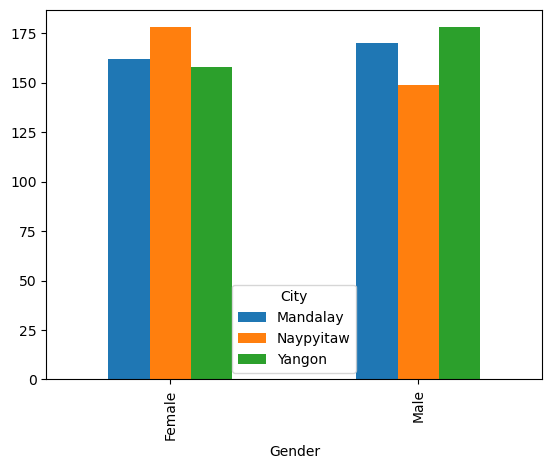

In [70]:
female_shoppers.unstack(level = 0).plot(kind='bar')
plt.show()

We can always use our standard libraries for plots, such as matplotlib(https://matplotlib.org/) or seaborn(https://seaborn.pydata.org/index.html). Make sure to investigate them to be able to pick which one you like. I personally, like plotly (https://plotly.com/graphing-libraries/).

To be able to use it, you need to ofc install it. It's available in Anaconda Navigator, but othewise, we can install it in the Anaconda Prompt by typing

```
$ conda install -c plotly plotly=5.14.1
 
```

or in the Terminal 

```
$ pip install plotly==5.14.1


```

In [5]:
import plotly.graph_objects as go
import plotly.express as px


In [6]:
fig = px.bar(sales, x = 'Gender', y = 'Invoice ID',
                     hover_name = 'City',color = 'City')

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
'title': 'city with more male shoppers'})

fig.show()

NameError: name 'sales' is not defined

2. Who spends more, men or women (in this particular dataframe)?


In [3]:
from matplotlib import pyplot as plt
whospends=sales.groupby(['Customer type']).sum()["Total"]
whospends.plot(kind=bar)

plt.show()

NameError: name 'sales' is not defined

In [4]:
spending.

SyntaxError: invalid syntax (2915325832.py, line 1)

3. Which type of customer spends more, member or non- member?    

C:\Users\User\AppData\Local\Temp\ipykernel_10380\1645065590.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



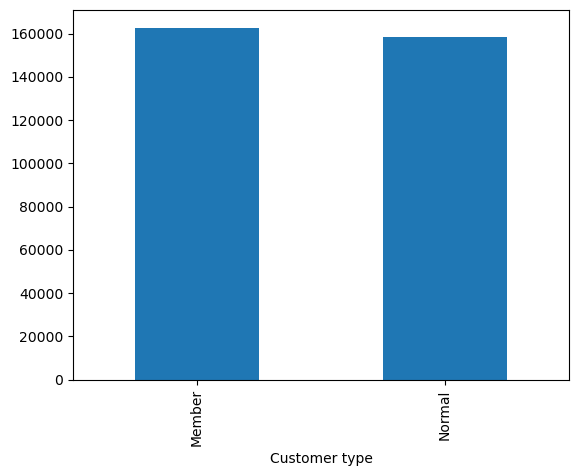

In [77]:
from matplotlib import pyplot as plt
whospends=sales.groupby(['Customer type']).sum()["Total"]
whospends.plot(kind="bar")

plt.show()


4. Which product line sells the most?

C:\Users\User\AppData\Local\Temp\ipykernel_10380\3100323450.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



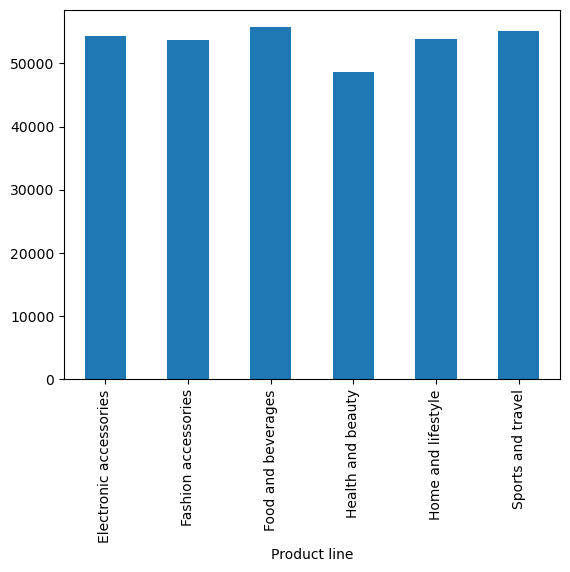

In [78]:
from matplotlib import pyplot as plt
whospends=sales.groupby(["Product line"]).sum()["Total"]
whospends.plot(kind="bar")

plt.show()

5. Which product line is popular among men or women?

In [ ]:
product= sales.groupby(['Product line','Gender']).count()['Total']

fig = px.bar(sales, x = 'Product line', y = 'Invoice ID',
                     hover_name = 'Product line',color = 'Gender')

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
'title': 'city with more male shoppers'})

fig.show()


6. What day of month makes the highest sales?

In [161]:
sales['Day'] = sales['Date'].dt.day

In [162]:
sales.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,4.0110,80.2200,2019-03-08,2023-05-11 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-05-11 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-05-11 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27


In [163]:
day_sales = sales.groupby('Day').sum()['Total']
day_sales

C:\Users\User\AppData\Local\Temp\ipykernel_11872\1103660537.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Day
1      9824.0835
2     12646.7565
3     12399.2295
4      7957.6245
5     11908.0500
6      9612.2250
7     11500.7130
8     13503.7770
9     13767.2850
10     9865.2015
11     9618.3675
12    11861.3040
13     5389.7235
14    13635.3420
15    15717.4605
16     9947.3220
17    10418.6145
18     5569.3365
19    14883.2355
20    11820.0705
21     5663.3535
22     7326.2280
23    12428.8185
24    11601.9750
25    11780.5695
26     8828.1900
27    13233.2970
28     8800.9005
29     7539.8085
30     7045.3215
31     5232.4965
Name: Total, dtype: float64

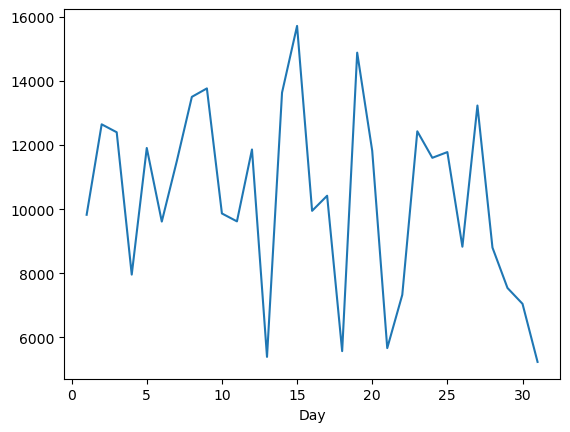

In [164]:
day_sales.plot()
plt.show()

In [165]:
day_sales_df = day_sales.to_frame().reset_index()
day_sales_df.head(2)

,Day,Total
0,1,9824.0835
1,2,12646.7565


In [166]:
fig = px.line(day_sales_df, x='Day', y="Total")
fig.show()

7. Which month makes the most sales?

In [173]:
sales['Month'] = sales['Date'].dt.month

In [181]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,4.0110,80.2200,2019-03-08,2023-05-11 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-05-11 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-05-11 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-05-11 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,2023-05-11 18:30:00,Ewallet,597.73,4.761905,29.8865,4.1,25,3


In [182]:
month_sales = sales.groupby('Month').sum()['Total']
month_sales

C:\Users\User\AppData\Local\Temp\ipykernel_11872\3516225620.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Month
1    115742.8965
2     96877.7040
3    108706.0800
Name: Total, dtype: float64

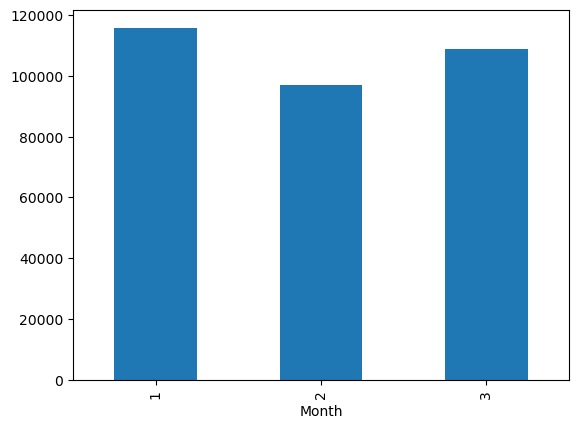

In [183]:
month_sales.plot(kind="bar")
plt.show()

8. Find the highest unit price in the product line.


C:\Users\User\AppData\Local\Temp\ipykernel_11872\2498389261.py:1: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.



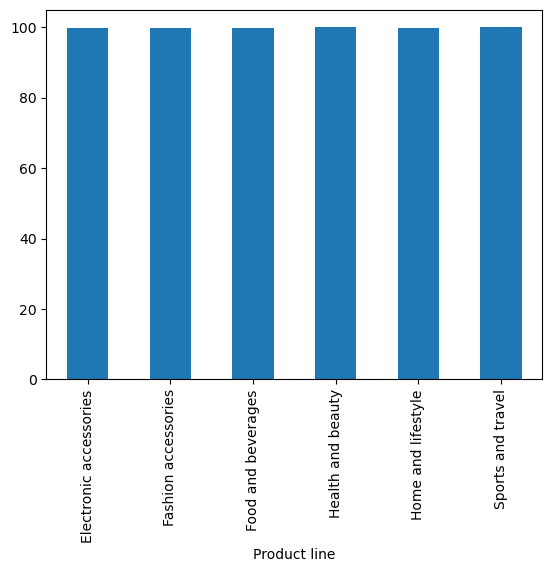

In [185]:
unitprice_max=sales.groupby("Product line").max()["Unit price"]
unitprice_max.plot(kind="bar")
plt.show()

9. Find the most popular payment method used by customers

<Axes: ylabel='Payment'>

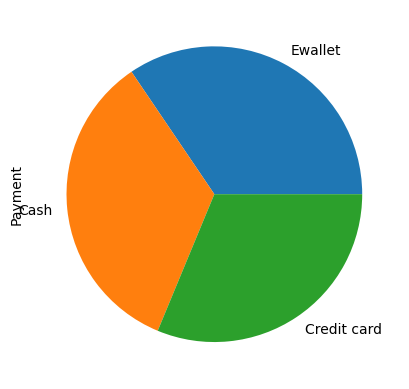

In [188]:
sales['Payment'].value_counts().plot(kind='pie')

In [ ]:
df_payment=sales['Payment'].value_counts()

10. Find the payment method that lead to the most amount of money per branch

In [190]:
payment = sales.groupby(['Branch','Payment']).sum()['Total']
payment

C:\Users\User\AppData\Local\Temp\ipykernel_11872\158380205.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Branch  Payment    
        Ewallet          433.6920
A       Cash           33572.5110
        Credit card    33094.7505
        Ewallet        37816.4745
B       Cash           35339.4615
        Credit card    37344.8565
        Ewallet        33513.3540
C       Cash           42788.0565
        Credit card    30327.4650
        Ewallet        37096.0590
Name: Total, dtype: float64

<Axes: xlabel='Branch,Payment'>

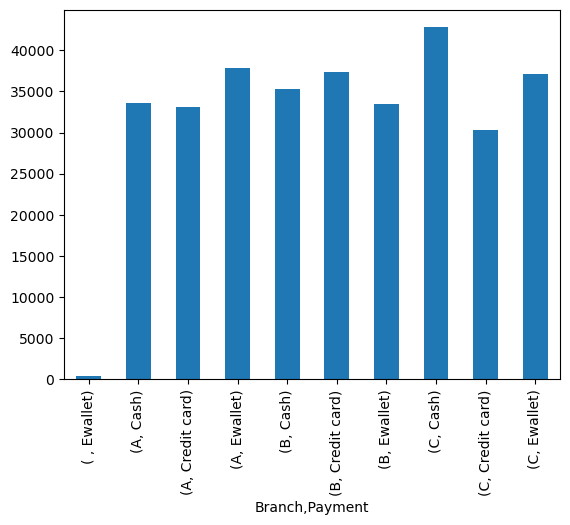

In [193]:
payment.plot(kind='bar')

### Let's save our dataset


Pickle files are serialized data structures that allow you to maintain data state across sessions and they're often used in data science workflows.

We want to save our dataframe as is now, after we've cleaned the duplicates and missing entries and then load it to the next notebook we'll be using. For that, we're using the ```to_pickle()``` function:



In [ ]:
sales.to_pickle('sales.pkl')

Now, the file calles 'sales.pkl' should appear in our folder.

### References and literature

- Source of dataset - https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales
- W3Schools Pandas Tutorial - https://www.w3schools.com/python/pandas/default.asp
- Data Science Handbook: https://jakevdp.github.io/PythonDataScienceHandbook/
- more EDA on this dataset - https://www.kaggle.com/code/bharadwajnalla/sales-exploratory-data-analysis
- good tutorial on Meidum - https://medium.com/ds-notes/learning-python-pandas-in-minutes-part-1-basics-f24463da1a18
- good tutorial on GitHub - https://github.com/alod83/data-science